In [1]:
import pandas as pd
import numpy as np
from os import listdir
from matplotlib import image
import PIL
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
X = []
X = pd.read_excel('features_spheroids.xlsx')
X.shape

(11821, 33)

In [3]:
X_subset = X[(X["homo_c"] == 25) & (X["homo_d"] == 25) & (X["hetero"] == 0) |
                (X["homo_c"] == 25) & (X["homo_d"] == 75) & (X["hetero"] == 0) |
                (X["homo_c"] == 75) & (X["homo_d"] == 25) & (X["hetero"] == 0) |
                (X["homo_c"] == 75) & (X["homo_d"] == 75) & (X["hetero"] == 0)]

In [4]:
inertia=[]
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=0,n_init=25).fit(
        X_subset[["num_green_regions","num_red_regions"]])
    inertia.append(kmeans.inertia_)

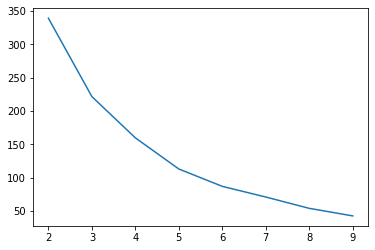

In [5]:
plt.plot(np.array(range(2,10)), inertia)

In [6]:
kmeans = KMeans(n_clusters=6, random_state=0,n_init=25).fit(
        X_subset[["num_green_regions","num_red_regions"]])

In [7]:
kmeans.cluster_centers_

array([[1.        , 1.88679245],
       [3.41818182, 1.52727273],
       [1.28787879, 4.15151515],
       [2.        , 1.70833333],
       [1.        , 3.        ],
       [2.30188679, 3.0754717 ]])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


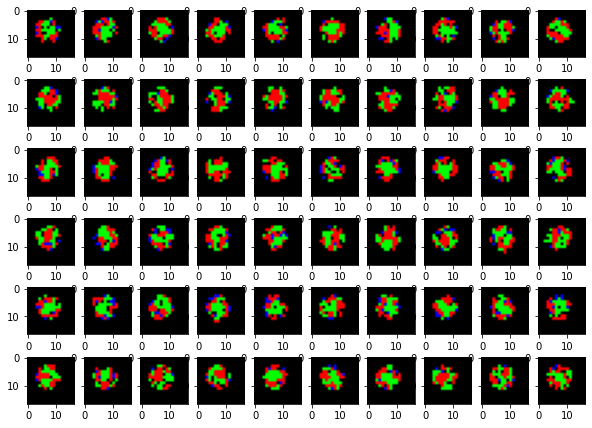

In [9]:
import random
import matplotlib.pyplot as plt
X_subset["label"] = kmeans.labels_
fig=plt.figure(figsize=(10,10))
c = 0
for i in range(6):
    group = X_subset[X_subset["label"] == i]
    group_sample=random.sample(list(group["file-path"]),10)    
    for j in group_sample:
        c = c+1
        img = Image.open(j)
        rgb = img.convert('RGB')
        fig.add_subplot(8, 10, c)
        plt.imshow(rgb)